In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from reproject.healpix import reproject_to_healpix

import os
print (os.getcwd())
print (os.listdir())

from astropy.io import fits


/home/cbllover/HalfDome
['halfdome_y100_halo_mass_hist_for_kSZ_m1e12.png', 'cosmology.py', 'y_100.fits:Zone.Identifier', 'kappa_zs0.5_s100.fits:Zone.Identifier', 'halfdome_y100_halo_mass_hist_for_kSZ_m1e13.png', '.git', 'Comparison_between_HalfDome_and_websky_M13_cut_all3.png', 'kappa_zs0.5_s100.fits', 'kSZ_HalfDome_y100_big.png', 'hist.png', 'other_sim_kSZ_sigmoid.jl', 'poly4_fit.png', 'Comparison_between_HalfDome_and_websky_full.png', 'Websky_tests.ipynb', 'poly3_fit.png', 'batched_data', 'halfdome_y100_halo_mass_hist_for_kSZ_total_sigmoid.png', 'Halfdome_analysis-checkpoint.ipynb', 'ksz_websky.fits:Zone.Identifier', 'globusconnectpersonal-latest.tgz', 'cached2_model_sigmoid_Ntheta512_pad256_integral_reduced_acc.jld2', 'kSZ_HalfDome_y100_m1e13_sigmoid.png', 'y_100.fits', 'y_tSZ_total_sigmoid.fits', 'globusconnectpersonal-3.2.8', 'Halfdome_analysis.ipynb', 'ksz_websky.fits', 'Comparison_between_HalfDome_and_websky_xscale.png', 'lightcone_100.hdf5:Zone.Identifier', 'kSZ_Box0_35x35_MAGN

# Julia/xgpaint results

In [2]:
def plot_kSZ(fname, title = "kSZ map TOTAL (NSIDE=2048)", unit = r"ΔT, $(\mu K)$", cmap = "plasma", scale = 1):
    # The tSZ Compton-y map (field 0)
    y_map = hp.read_map(fname, field=0, nest=False, dtype=np.float32)
    
    # Plot it directly
    hp.mollview(y_map*scale, title=title, unit=unit, norm="hist", cmap = cmap, format="%.1e")
    hp.graticule()
    plt.show()
    return y_map

In [3]:
def power_spectra_computation(fname):
    data_full = hp.read_map(fname, field=0, nest=False, dtype=np.float32)

    lmax = 3*hp.get_nside(data_full) - 1
    cl = hp.anafast(data_full, lmax=lmax)
    ell = np.arange(len(cl))
    Dl = ell*(ell+1)*cl/(2*np.pi)
    return Dl, ell

In [4]:
def plot_power_spectra(y_map, title = "Power spectrum of total kSZ map"):
    lmax = 3*hp.get_nside(y_map) - 1
    cl = hp.anafast(y_map, lmax=lmax)
    ell = np.arange(len(cl))

    Dl = ell*(ell+1)*cl/(2*np.pi)*10**12
    #Dl = cl/(2*np.pi)*10**12
    plt.loglog(ell, Dl*10**6)
    plt.xlabel(r"$\ell$"); plt.ylabel(r"$\ell(\ell+1)C_\ell/2\pi, (\mu K^2)$")
    plt.xlim((70, 6000))
    plt.title(title)
    plt.show()
    return Dl

# WEB-sky comparison

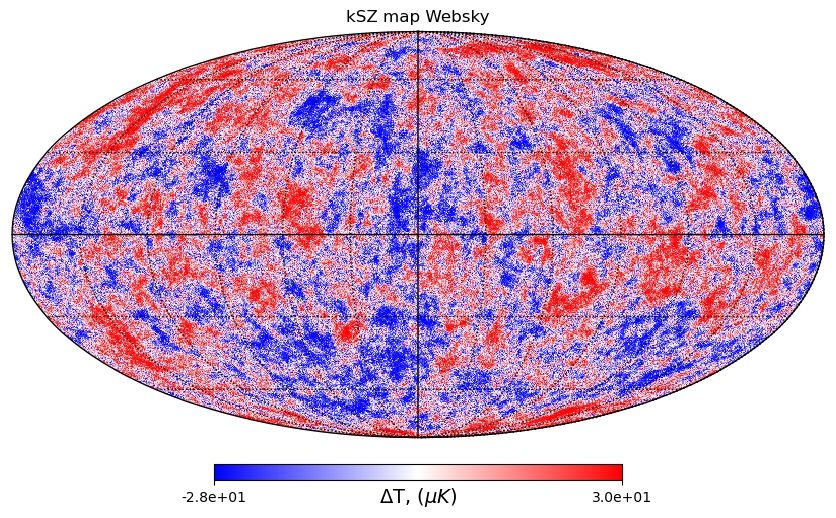

In [4]:

fname = "ksz_websky.fits"
websky_full = plot_kSZ(fname, title  = r"kSZ map Websky", unit = r"ΔT, $(\mu K)$", cmap = "bwr")

In [30]:
fname = "ksz_websky.fits"
Dl1, ell1 = power_spectra_computation(fname)

In [32]:

fname9= "other_sims/148_ksz_healpix_nopell_Nside4096_DeltaT_uK.fits"
Dl9, ell9 = power_spectra_computation(fname9)

In [33]:
fname10 = "other_sims/other_sim_Tcmb_tSZ_nside4096_sigmoid_13Msol_cutoff_HALO_m200m.fits"
Dl10, ell10 = power_spectra_computation(fname10)

In [13]:
fname17= "batched_data/websky_kSZ_nside4096_sigmoid_13Msol_cutoff_HALO_m200m_BATCHED.fits"
Dl17, ell17 = power_spectra_computation(fname17)

In [17]:
fname18= "batched_data/websky_kSZ_nside4096_sigmoid_13Msol_cutoff_HALO_m200c_BATCHED.fits"
Dl18, ell18 = power_spectra_computation(fname18)

In [20]:
fname19 = "HalfDome_kSZ_nside4096_sigmoid_r0_3_position_hcorr_13Msol_cutoff_HALO.fits"
Dl19, ell19 = power_spectra_computation(fname19)

In [26]:
fname20 = "batched_data/websky_kSZ_nside4096_sigmoid_13Msol_cutoff_HALO_m200c_an_BATCHED.fits"
Dl20, ell20 = power_spectra_computation(fname20)

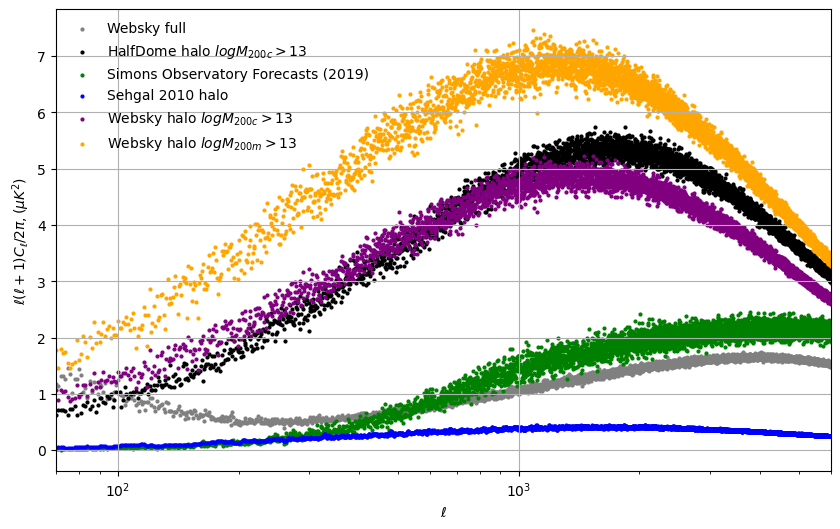

In [36]:
plt.figure(figsize = (10, 6))
factor_mult = (2.7255*1e6)**2
CMB_factor = 1/(2.73**2)


plt.scatter(ell1, Dl1, s = 4, label = "Websky full", c= 'grey')
plt.scatter(ell16, Dl16*factor_mult, s = 4, label = "HalfDome halo $logM_{200c} > 13$", c = "black")
plt.scatter(ell9, Dl9, s = 4, label = "Simons Observatory Forecasts (2019)", c = "green")
plt.scatter(ell10, Dl10*factor_mult, s = 4, label = "Sehgal 2010 halo ", c = "blue")
plt.scatter(ell18, Dl18*factor_mult, s = 4, label = "Websky halo $logM_{200c} > 13$", c = "purple")
plt.scatter(ell17, Dl17*factor_mult, s = 4, label = "Websky halo $logM_{200m} > 13$", c = "orange")




plt.xlabel(r"$\ell$"); plt.ylabel(r"$\ell(\ell+1)C_\ell/2\pi, (\mu K^2)$")
plt.xlim((70, 6000))
plt.xscale("log")
# plt.title(title)
plt.legend(frameon = False)
plt.grid()
plt.savefig("Comparison_between_different_datasets.png")
plt.show()

### (Websky has m200m)

Data for other sims from https://lambda.gsfc.nasa.gov/simulation/full_sky_sims_ov.html

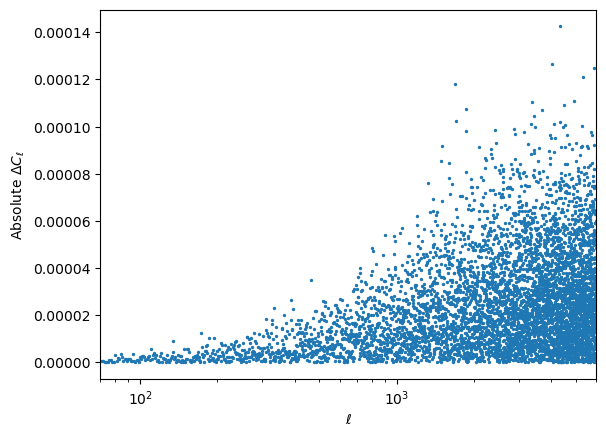

In [24]:
plt.scatter(ell16, abs((Dl16*factor_mult - Dl19*factor_mult)), s = 2, label = "HalfDome M>1e13")
plt.xlim((70, 6000))
plt.xlabel(r"$\ell$")
plt.ylabel(r"Absolute $\Delta C_{\ell}$")
plt.xscale("log")

## Cosmology
#### Websky:
(Ωm,Ωb,σ8,ns,h,τ) =(0.31,0.049,0.81,0.965,0.68,0.055)

Halo mass = 1.2 10^(12) M_sol(z < 4). Up to z = 4.6 it becomes 4e12 M_sol
#### Halfdome:
 h=0.6774, Ωm=0.3089, Ωb=0.0486, σ8=0.8159, ns=0.9667, Mν=0
 
 Halo Mass = 1.95 * 10^10 M_sol (in reality its around 5e12 M_sol from histograms of data)
 

In [ ]:
# fname2 = "y_tSZ_small_sigmoid.fits"
# Dl3, ell3 = power_spectra_computation(fname2)

# fname3 = "y_tSZ_nside4096_sigmoid_m1e13_corr_units.fits"


# Dl4, ell4 = power_spectra_computation(fname3)

# fname4 = "y_tSZ_nside4096_sigmoid_m1e13.fits"

# Dl5, ell5 = power_spectra_computation(fname4)

# fname5 = "y_tSZ_nside4096_sigmoid_m1e13_corr_units_increased_acc.fits"

# Dl6, ell6 = power_spectra_computation(fname5)

# fname6 = "y_tSZ_nside1024_sigmoid_m1e13_corr_units_increased_acc.fits"
# Dl7, ell7 = power_spectra_computation(fname6)

# fname7= "y_tSZ_nside4096_sigmoid_13Msol_cutoff_HALO _m200m.fits"
# Dl8, ell8 = power_spectra_computation(fname7)


# fname11 = "Tcmb_tSZ_nside4096_sigmoid_r03_13Msol_cutoff_HALO.fits"
# Dl11, ell11 = power_spectra_computation(fname11)


# fname12= "Tcmb_tSZ_nside4096_battaglia_13Msol_cutoff_HALO.fits"
# Dl12, ell12= power_spectra_computation(fname12)


# fname13= "Tcmb_tSZ_nside4096_sigmoid_r0_3_va_13Msol_cutoff_HALO.fits"
# Dl13, ell13= power_spectra_computation(fname13)


# fname14= "Tcmb_tSZ_nside4096_sigmoid_r0_3_dva_13Msol_cutoff_HALO.fits"
# Dl14, ell14= power_spectra_computation(fname14)

# fname15= "Tcmb_tSZ_nside4096_sigmoid_r0_3_hcorr_13Msol_cutoff_HALO.fits"
# Dl15, ell15= power_spectra_computation(fname15)

# fname17= "batched_data/websky_kSZ_nside4096_sigmoid_13Msol_cutoff_HALO_m200m_BATCHED.fits"
# Dl17, ell17 = power_spectra_computation(fname17)